In [2]:
# ライブラリの準備
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Test data

In [3]:
# テストデータのロード
iris = sns.load_dataset('iris')

# データの整形
iris = iris.set_index('species').T

# 内容の確認
iris.head()

species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


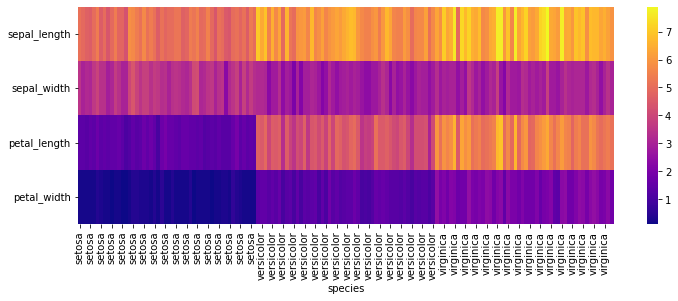

In [7]:
# Figureのサイズを設定する
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(111)

# ヒートマップを描画する
ax = sns.heatmap(iris, cmap = 'plasma')

# Data from ra-san

In [9]:
# データの読み込み
df = pd.read_csv("./data/cell_type_order_enrichment_ratio", sep = "\t")

In [22]:
# 先頭5行を表示
df.head()

,cell_type,cell,enrichment%,average_enrichment,ratio(disease/random)
0,Connective,AG10803-DS12374,0.000142,0.000261,0.545852
1,Connective,AoAF-DS13513,0.000191,0.000234,0.817490
2,Connective,HCF-DS12501,0.000193,0.000309,0.622642
3,Connective,HCFaa-DS13480,0.000242,0.000335,0.721649
4,Connective,HFF_P5-DS15115,0.000146,0.000228,0.641711


## Heatmap

In [11]:
# データの整形
ratio_df = df.set_index("cell")[["ratio(disease/random)"]].T

ratio_df.head()

cell,AG10803-DS12374,AoAF-DS13513,HCF-DS12501,HCFaa-DS13480,HFF_P5-DS15115,HGF-DS11752,HMF-DS13368,HPAF-DS13411,HPF-DS13390,HPdLF-DS13573,...,h.Trophoblast-DS30557,h.Trophoblast-DS31397,h.Trophoblast-DS30582,h.Trophoblast-DS30587,h.f.Umbilical.Cord-DS24820,h.f.Umbilical.Cord-DS24722,h.HepG2-DS7764,h.HepG2-DS24838,h.hepatocytes-DS32057,h.ISL1-DS55938
ratio(disease/random),0.545852,0.81749,0.622642,0.721649,0.641711,0.550239,0.684932,1.040724,0.803109,0.650407,...,0.905172,1.111111,0.930851,0.819502,0.752212,0.875912,1.282051,1.019417,0.883333,0.780255


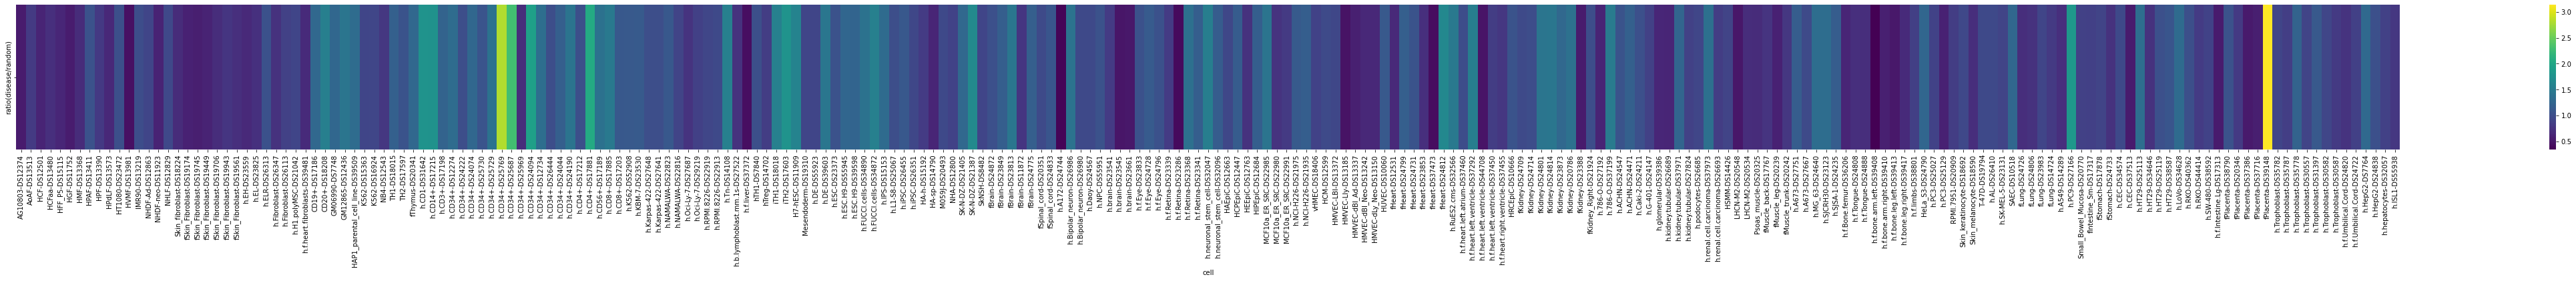

In [12]:
# Figureのサイズを設定する
fig = plt.figure(figsize = (80, 4))
ax = fig.add_subplot(111)

# ヒートマップを描画する
ax = sns.heatmap(ratio_df, cmap = 'viridis')

細胞の数が多すぎてヒートマップだと見づらい、、、

## Boxplot

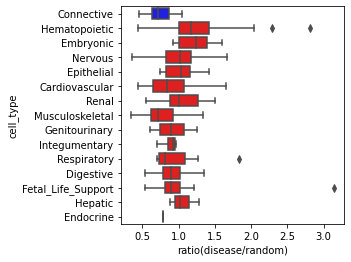

In [25]:
# Figureのサイズを設定する
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)

# 箱ひげ図を描画する
ax = sns.boxplot(data = df, x = "ratio(disease/random)", y = "cell_type", 
                 palette = ["blue", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red"]) #色は自由に変えられる

# 図を保存する
plt.savefig("./fig/celltype_enrichment_boxplot.png", dpi = 800)

In [24]:
# 統計検定
import scipy